# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Paillasse d'expérimentation
---

## Sujet : Bag of Words sur Corpus Labelisé

---


## Initialisation de la paillasse 
---

In [2]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [3]:
import importlib
import pandas as pd

## Observations et environnement
---

### Chargement du corpus

In [6]:
corpus_filename = '221001-CorpusNewslabel.csv'
corpus_dtypes = {'title':str,'date': str,'date_iso': str}

In [7]:
df_corpus = pd.read_csv(f'data/corpus/{corpus_filename}', dtype = corpus_dtypes)
df_corpus = df_corpus.convert_dtypes()

In [13]:
df_corpus[df_corpus['author'].isna()]

,title,article,tag,abstract,author,date,date_iso,site,text,infox,url
0,"Tous les jeunes, portez la nouvelle (russe)",par Pepe Escobar. L’OCS à Samarcande et l’Asse...,"[""Faits d'actu"", ""Faits d'actu"", ""Faits d'actu...",<NA>,<NA>,30 septembre 2022,2022-09-30T00:00:00,reseauinternational.net,"Tous les jeunes, portez la nouvelle (russe) pa...",0,https://reseauinternational.net/tous-les-jeune...
1,Adhésion à la Russie : 93% pour le « oui » dan...,"Dans les régions de Zaporijia et de Kherson, 9...","[""Faits d'actu"", ""Faits d'actu"", ""Faits d'actu...",<NA>,<NA>,30 septembre 2022,2022-09-30T00:00:00,reseauinternational.net,Adhésion à la Russie : 93% pour le « oui » dan...,0,https://reseauinternational.net/adhesion-a-la-...
2,ONU – Le Premier ministre de Nouvelle-Zélande ...,L’argument principal de la ministre est que le...,"['Mot-clés : censure, jacinda ardern, ONU', 'P...",<NA>,<NA>,29 septembre 2022,2022-09-29T00:00:00,lemediaen442.fr,ONU – Le Premier ministre de Nouvelle-Zélande ...,1,https://lemediaen442.fr/onu-le-premier-ministr...
4,Donatello : génie de la Renaissance,"Portrait du sculpteur Donatello (1386-1466), p...","['Culture', 'Culture & Patrimoine', 'Histoire'...",<NA>,<NA>,Le 27 septembre 2022,2022-09-27T00:00:00,www.breizh-info.com,Donatello : génie de la Renaissance Portrait d...,<NA>,https://www.breizh-info.com/2022/09/27/208410/...
5,Que reste-il de notre souveraineté ? Le 75ème ...,Que reste-il de notre souveraineté ? Le 75ème ...,"['Sociétal', 'réfléchir et agir', 'souveraineté']",<NA>,<NA>,Le 27 septembre 2022,2022-09-27T00:00:00,www.breizh-info.com,Que reste-il de notre souveraineté ? Le 75ème ...,<NA>,https://www.breizh-info.com/2022/09/27/208417/...
...,...,...,...,...,...,...,...,...,...,...,...
89157,Zelensky est « une marionnette qui fait inutil...,Encore un journaliste surpris qu’un colonel am...,['30 mars 2022 | \n\t\t\t\t\t\t\t\tCatégorie: ...,<NA>,<NA>,<NA>,<NA>,www.profession-gendarme.com,Zelensky est « une marionnette qui fait inutil...,<NA>,https://www.profession-gendarme.com/zelensky-e...
89158,Zélensky : l’arnaque de la contre-offensive uk...,Le président Zelensky et ses alliés de l’Otan ...,['26 septembre 2022 | \n\t\t\t\t\t\t\t\tCatégo...,<NA>,<NA>,<NA>,<NA>,www.profession-gendarme.com,Zélensky : l’arnaque de la contre-offensive uk...,<NA>,https://www.profession-gendarme.com/zelensky-l...
89159,Zelensky massacre maintenant des citoyens ukra...,ZELENSKY A ORDONNÉ QUE TOUTES LES PERSONNES FU...,['6 mars 2022 | \n\t\t\t\t\t\t\t\tCatégorie: A...,<NA>,<NA>,<NA>,<NA>,www.profession-gendarme.com,Zelensky massacre maintenant des citoyens ukra...,<NA>,https://www.profession-gendarme.com/zelensky-m...
89160,Zéro mort du coronavirus : comment expliquer l...,Le Vietnam est une exception dans le monde : a...,['23 avril 2020 | \n\t\t\t\t\t\t\t\tCatégorie:...,<NA>,<NA>,<NA>,<NA>,www.profession-gendarme.com,Zéro mort du coronavirus : comment expliquer l...,<NA>,https://www.profession-gendarme.com/zero-mort-...


In [6]:
df_corpus[df_corpus['url'].isna()]

,title,article,tag,abstract,author,date,date_iso,site,text,infox,url


### Chargement du predicteur

In [7]:
import pickle

pred_filename = 'data/predictors/220930-cv_lr.pp'
with open(pred_filename,'rb') as file:
    predictor = pickle.load(file) 

predictor

{'descriptor': CountVectorizer(stop_words=['de', 'la', 'le', 'les', 'et', 'des', 'en', 'un',
                             'du', 'est', 'une', 'que', 'pour', 'dans', 'qui',
                             'il', 'par', 'sur', 'au', 'pas', 'plus', 'ce', 'ne',
                             'qu', 'se', 'ont', 'avec', 'sont', 'ou', 'son', ...]),
 'classifier': LogisticRegression(max_iter=1000),
 'data': ''}

## Expérience
---

### Entrainement nouveau prédicteur (optionel)

#### Mots non signifiants

In [8]:
import patat.ml.lex_analyser

lex = patat.ml.lex_analyser.LexAnalyser()

def merge_texts(texts):
    result = ''
    for text in texts:
        result = result + text + '\n'
    return result

def count_words_label(df,label):
    df_texts = pd.pivot_table(df, values='text', index=None, columns=label, aggfunc=merge_texts)
    wc = {}
    word_analysis = {}
    for key in df_texts.keys():
        text = df_texts[key]['text']
        count_colname = label+'_'+str(key)
        wc[key] = lex.count_tokens(lex.get_words(text))
        for word in wc[key]:
            word_dic = word_analysis.get(word,{})
            word_dic[count_colname]=wc[key][word]
            word_analysis[word]=word_dic
    return word_analysis

df_count = pd.DataFrame(count_words_label(df_corpus,'infox')).T
df_count = df_count.fillna(0)

In [9]:
df_count.shape

(34202, 2)

In [10]:
df_count

,infox_0.0,infox_1.0
tous,188.0,350.0
les,3883.0,7521.0
jeunes,31.0,89.0
portez,2.0,0.0
la,6101.0,9656.0
...,...,...
refuseniks,0.0,1.0
sentis,0.0,1.0
consultée,0.0,1.0
concernaient,0.0,1.0


#### Identification des mots rares

In [11]:
occ_rare = 3
def is_rare(row):
    return row['infox_0.0'] < occ_rare and row['infox_1.0'] < occ_rare

df_rare = df_count[df_count.apply(is_rare,axis=1)]

rare_words = list(df_rare.index)
len(rare_words)

### Identification des mots communs

common_size = 100
top_0 = df_count.sort_values('infox_0.0',ascending=False).head(common_size).index
top_1 = df_count.sort_values('infox_1.0',ascending=False).head(common_size).index
common_words = []
for word in top_0:
    if word in top_1:
        common_words.append(word)
len(common_words)

common_words

ignore_words = common_words + rare_words

In [12]:
common_words

['de',
 'la',
 'le',
 'les',
 'et',
 'des',
 'en',
 'un',
 'du',
 'est',
 'une',
 'que',
 'pour',
 'dans',
 'qui',
 'il',
 'par',
 'sur',
 'au',
 'pas',
 'plus',
 'ce',
 'ne',
 'qu',
 'se',
 'ont',
 'avec',
 'sont',
 'ou',
 'son',
 'été',
 'nous',
 'aux',
 'mais',
 'comme',
 'cette',
 'on',
 'pays',
 'elle',
 'fait',
 'être',
 'tout',
 'ces',
 'même',
 'leur',
 'aussi',
 'sa',
 'si',
 'monde',
 'ses',
 'contre',
 'sans',
 'bien',
 'vous',
 'ils',
 'faire',
 'depuis',
 'je',
 'russie',
 'deux',
 'entre',
 'après',
 'avait',
 'guerre',
 'non',
 'ukraine',
 'autres',
 'peut',
 'covid',
 'était',
 'selon',
 'avoir',
 'ans',
 'tous',
 'cela',
 'où',
 'alors',
 'leurs',
 'encore',
 'très',
 'moins',
 'dont',
 'états',
 'autre',
 'également',
 'état',
 'cas',
 'soit']

#### Vectorizer

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
count_vectorizer = CountVectorizer(stop_words=ignore_words)
#count_vectorizer = CountVectorizer()

In [15]:
corpus = df_corpus['text']
X = count_vectorizer.fit_transform(corpus)
y = df_corpus['infox']

### Construction des Datasets d'entrainement et de test

In [23]:
df_train = df_corpus[df_corpus['infox'].notna()]
X_train = X[df_train.index]
y_train = df_train['infox']

In [24]:
X_train.shape

(445, 404172)

### Entrainement du modele

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr', max_iter=1000)
classifier = LogisticRegression(max_iter=1000)

# Fit the model
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

### Prédictions sur le corpus

In [28]:
df_pred = df_corpus

In [29]:
%%time
X = count_vectorizer.transform(df_pred['text'])

CPU times: user 16.7 s, sys: 169 ms, total: 16.9 s
Wall time: 16.9 s


In [30]:
%%time
y = classifier.predict(X)
y_proba = classifier.predict_proba(X)[:,1]




CPU times: user 79 ms, sys: 28.8 ms, total: 108 ms
Wall time: 103 ms


In [31]:
df_pred.loc[:,'y'] = y
df_pred.loc[:,'y_proba'] = y_proba

In [32]:
df_pred

,title,article,tag,abstract,author,date,date_iso,site,text,infox,url,y,y_proba
0,"Tous les jeunes, portez la nouvelle (russe)",par Pepe Escobar.\nL’OCS à Samarcande et l’Ass...,"[""Faits d'actu"", ""Faits d'actu"", ""Faits d'actu...",NaN,NaN,30 septembre 2022,2022-09-30T00:00:00,reseauinternational.net,"Tous les jeunes, portez la nouvelle (russe)\np...",0.0,https://reseauinternational.net/tous-les-jeune...,0.0,0.005243
1,Adhésion à la Russie : 93% pour le « oui » dan...,"Dans les régions de Zaporijia et de Kherson, 9...","[""Faits d'actu"", ""Faits d'actu"", ""Faits d'actu...",NaN,NaN,30 septembre 2022,2022-09-30T00:00:00,reseauinternational.net,Adhésion à la Russie : 93% pour le « oui » dan...,0.0,https://reseauinternational.net/adhesion-a-la-...,0.0,0.013535
2,ONU – Le Premier ministre de Nouvelle-Zélande ...,L’argument principal de la ministre est que le...,"['Mot-clés : censure, jacinda ardern, ONU', 'P...",NaN,NaN,29 septembre 2022,2022-09-29T00:00:00,lemediaen442.fr,ONU – Le Premier ministre de Nouvelle-Zélande ...,1.0,https://lemediaen442.fr/onu-le-premier-ministr...,1.0,0.963910
3,Compostage humain: les “funérailles vertes” ga...,"Aux États-Unis, les différents gouvernements r...",[],NaN,Auteur(s)\nFranceSoir,Publié le 28 septembre 2022 - 13:15,2022-09-28T13:15:00,www.francesoir.fr,Compostage humain: les “funérailles vertes” ga...,0.0,https://www.francesoir.fr/societe-environnemen...,0.0,0.009231
4,Donatello : génie de la Renaissance,"Portrait du sculpteur Donatello (1386-1466), p...","['Culture', 'Culture & Patrimoine', 'Histoire'...",NaN,NaN,Le \n\t\t\t\t\t\t\t\t\t\t27 septembre 2022,2022-09-27T00:00:00,www.breizh-info.com,Donatello : génie de la Renaissance\nPortrait ...,NaN,https://www.breizh-info.com/2022/09/27/208410/...,0.0,0.062406
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89157,Zelensky est « une marionnette qui fait inutil...,Encore un journaliste surpris qu’un colonel am...,['30 mars 2022 | \n\t\t\t\t\t\t\t\tCatégorie: ...,NaN,NaN,NaN,NaN,www.profession-gendarme.com,Zelensky est « une marionnette qui fait inutil...,NaN,https://www.profession-gendarme.com/zelensky-e...,1.0,0.700312
89158,Zélensky : l’arnaque de la contre-offensive uk...,Le président Zelensky et ses alliés de l’Otan ...,['26 septembre 2022 | \n\t\t\t\t\t\t\t\tCatégo...,NaN,NaN,NaN,NaN,www.profession-gendarme.com,Zélensky : l’arnaque de la contre-offensive uk...,NaN,https://www.profession-gendarme.com/zelensky-l...,1.0,0.753304
89159,Zelensky massacre maintenant des citoyens ukra...,ZELENSKY A ORDONNÉ QUE TOUTES LES PERSONNES FU...,['6 mars 2022 | \n\t\t\t\t\t\t\t\tCatégorie: A...,NaN,NaN,NaN,NaN,www.profession-gendarme.com,Zelensky massacre maintenant des citoyens ukra...,NaN,https://www.profession-gendarme.com/zelensky-m...,1.0,0.819197
89160,Zéro mort du coronavirus : comment expliquer l...,Le Vietnam est une exception dans le monde : a...,['23 avril 2020 | \n\t\t\t\t\t\t\t\tCatégorie:...,NaN,NaN,NaN,NaN,www.profession-gendarme.com,Zéro mort du coronavirus : comment expliquer l...,NaN,https://www.profession-gendarme.com/zero-mort-...,0.0,0.051020


### Mesure et observation des résultats

In [33]:
import numpy as np

In [34]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

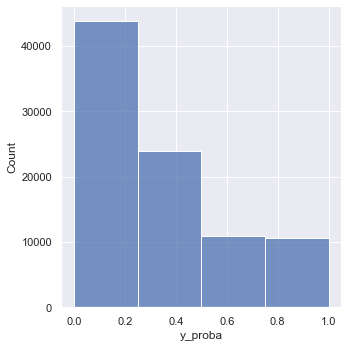

In [35]:
sns.displot(df_pred["y_proba"], binwidth=0.25)

In [36]:
df_recueil = df_corpus[df_corpus['infox'].notna()]
y_test = df_recueil['infox']
y_pred = df_recueil['y']

In [37]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Matrice de confusion')
print(cnf_matrix)
print(f'Accuracy score {metrics.accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'Recall score {metrics.recall_score(y_test, y_pred)*100:.2f}%')

Matrice de confusion
[[223   0]
 [  2 220]]
Accuracy score 99.55%
Recall score 99.10%


In [38]:
def size(y):
    return 'S' if y<=0.25 else 'L' if y>=0.75 else 'M'

In [40]:
df_pred['y_bin']=df_pred['y_proba'].apply(size)

In [42]:
df_pivot_sites = pd.pivot_table(df_pred[['site','y_bin']],index='site',columns='y_bin',aggfunc=np.count_nonzero)

In [43]:
df_pivot_sites.fillna(0,inplace=True)

In [44]:
df_pivot_sites['total']=df_pivot_sites['S']+df_pivot_sites['M']+df_pivot_sites['L']

In [45]:
df_pivot_sites['S_freq']=df_pivot_sites['S']/df_pivot_sites['total']
df_pivot_sites['L_freq']=df_pivot_sites['L']/df_pivot_sites['total']

In [46]:
df_pivot_sites

y_bin,L,M,S,total,S_freq,L_freq
site,,,,,,
actu.fr,174.0,1580.0,4006.0,5760.0,0.695486,0.030208
fr.novopress.info,106.0,888.0,530.0,1524.0,0.347769,0.069554
fr.sott.net,1478.0,2710.0,1714.0,5902.0,0.290410,0.250424
infodujour.fr,128.0,278.0,612.0,1018.0,0.601179,0.125737
lalettrepatriote.com,2.0,8.0,2.0,12.0,0.166667,0.166667
lemediaen442.fr,1076.0,3502.0,740.0,5318.0,0.139150,0.202332
lesakerfrancophone.fr,994.0,372.0,390.0,1756.0,0.222096,0.566059
lesdeqodeurs.fr,120.0,18.0,38.0,176.0,0.215909,0.681818
lesmoutonsrebelles.com,762.0,2612.0,1346.0,4720.0,0.285169,0.161441


## Sauvegarde des résultats
---

In [ ]:
predict_filename = '221001-CorpusNewsLabelPred.csv'
df_predict.to_csv(f'data/predictions/{predict_filename}',index=False)

## Conclusions
---

- Production Corpus Labelisé avec prédictions : OK

## Bricolages
---